In [10]:
import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

training = preprocessing.get_training_set()
test = preprocessing.get_test_set()
hh_char = preprocessing.INECDataSet('household_characteristics').get_dataset()
education = preprocessing.INECDataSet('edu').get_dataset()
edu_level = preprocessing.INECDataSet('edu_lvl').get_dataset()
assert not training.empty
assert not test.empty



Start to load data...
Processing... Please wait...


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

Start to load data...
Start to load data...


In [14]:
grp = training.groupby('Target')
g1 = grp.get_group(1)
g2 = grp.get_group(2)
g3 = grp.get_group(3)
g4 = grp.get_group(4)

In [34]:
avg_child = [ig['hogar_nin'].sum()/ig.shape[0] for ig in [g1,g2,g3,g4]]
avg_adult = [ig['hogar_adul'].sum()/ig.shape[0] for ig in [g1,g2,g3,g4]]
children = go.Bar(
    x=[1, 2, 3, 4],
    y=avg_child,
    name='Children'
)
adult = go.Bar(
    x=[1, 2, 3, 4],
    y=avg_adult,
    name='Adults'
)

layout = go.Layout(
    xaxis={'title': 'Income Group'},
    yaxis={'title': 'Average number per household'},
    barmode='stack'
)

fig = go.Figure(data=[children,adult], layout=layout)#, layout=layout)
py.iplot(fig)

In [85]:
t1 = go.Pie(labels=[1,2,3,4], values=[1.8, 34.23, 52.25, 11.71], hole=0.8)
t2 = go.Pie(labels=[1,2,3,4], values=[0.68, 38.69, 50.68, 9.95], hole=0.8, domain={'x': [0.11, 0.89], 'y': [0.11,0.89]})
t3 = go.Pie(labels=[1,2,3,4], values=[0.85, 44.51, 48.17, 6.48], hole=0.8, domain={'x': [0.2, 0.8], 'y': [0.2,0.8]})
t4 = go.Pie(labels=[1,2,3,4], values=[0.26, 56.04, 41.40, 2.30], domain={'x': [0.3, 0.7], 'y': [0.3,0.7]})

# layout = go.Layout(
#     xaxis={'title': 'Income Group'},
#     yaxis={'title': 'Average number per household'},
#     barmode='stack'
# )


fig = go.Figure(data=[t1, t2, t3, t4])#, layout=layout)
py.iplot(fig)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



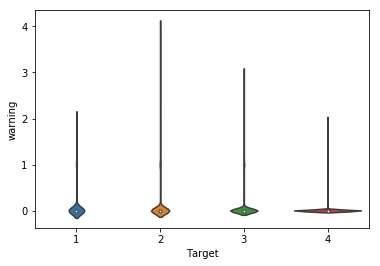

In [58]:
warning_cols = ['pisonotiene', 'abastaguano', 'noelec', 'sanitario1', 'energcocinar1']
training['warning'] = training[warning_cols].sum(axis=1)
sns.violinplot(y='warning',x='Target',data=training)

In [ ]:
def region_line_plot(df, col):
    """
    Creates plotly line plots comparing regions
    :param df: DataFrame storing the data
    :type df: Pandas DataFrame
    :param col: Name of the column to plot
    :type col: String
    """
    region = ['Central', ]

In [103]:
year = list(range(2010,2018))
pov = [21.2, 21.7, 20.6, 20.7, 22.4, 21.7, 20.5, 20.0]
poverty_old = go.Scatter(
    x = year[:5],
    y = pov[:5],
    mode = 'lines+markers',
    name = '% Poverty',
)
poverty_new = go.Scatter(
    x = year[4:],
    y = pov[4:],
    mode = 'lines+markers',
    name = '% Poverty'
)
layout = go.Layout(
    color='red'
)

fig = go.Figure(data=[poverty_old, poverty_new], layout=layout)
py.iplot(fig)